In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import category_encoders as ce
from sklearn.model_selection import train_test_split   # Used for splitting arrays or matrices into train and test subsets.
from sklearn.neighbors import KNeighborsClassifier     # Used for implementing the k-nearest neighbors value. 
from sklearn.metrics import confusion_matrix           # Used for evaluate the accuracy of a model.
from sklearn.metrics import classification_report  
from sklearn.metrics import accuracy_score     
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn import tree
from sklearn.metrics import accuracy_score,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt# Used for building a text report.

df=pd.read_csv(r'E:\shopwise.csv')
print(df.head())
print(df.tail())
print(df.info())
print(df.describe())
print(df.nunique())

   Tenure  WarehouseToHome  NumberOfDeviceRegistered    PreferedOrderCat  \
0    15.0             29.0                         4  Laptop & Accessory   
1     7.0             25.0                         4              Mobile   
2    27.0             13.0                         3  Laptop & Accessory   
3    20.0             25.0                         4             Fashion   
4    30.0             15.0                         4              Others   

   SatisfactionScore MaritalStatus  NumberOfAddress  Complain  \
0                  3        Single                2         0   
1                  1       Married                2         0   
2                  1       Married                5         0   
3                  3      Divorced                7         0   
4                  4        Single                8         0   

   DaySinceLastOrder  CashbackAmount  Churn  
0                7.0             143      0  
1                7.0             129      0  
2             

In [2]:
# Check for missing values in the dataset
# Impute missing values with the mean for numerical columns and mode for categorical columns

print(df.isnull().sum())
print(df.isnull().mean()*100)
for col in df.columns :
    if(df[col].dtype=="object"):
        df[col].fillna(df[col].mode()[0],inplace=True)
    else : 
        df[col].fillna(df[col].median(),inplace=True)
print(df.isnull().sum())

# Interpretation:
# - Ensure that no missing values remain after the imputation process.
# - Helps to confirm that the missing values were handled properly

Tenure                      26
WarehouseToHome             26
NumberOfDeviceRegistered     0
PreferedOrderCat             0
SatisfactionScore            0
MaritalStatus                0
NumberOfAddress              0
Complain                     0
DaySinceLastOrder           37
CashbackAmount               0
Churn                        0
dtype: int64
Tenure                      5.210421
WarehouseToHome             5.210421
NumberOfDeviceRegistered    0.000000
PreferedOrderCat            0.000000
SatisfactionScore           0.000000
MaritalStatus               0.000000
NumberOfAddress             0.000000
Complain                    0.000000
DaySinceLastOrder           7.414830
CashbackAmount              0.000000
Churn                       0.000000
dtype: float64
Tenure                      0
WarehouseToHome             0
NumberOfDeviceRegistered    0
PreferedOrderCat            0
SatisfactionScore           0
MaritalStatus               0
NumberOfAddress             0
Complain      

C:\Users\HP\AppData\Local\Temp\ipykernel_8624\831415320.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(),inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_8624\831415320.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when 

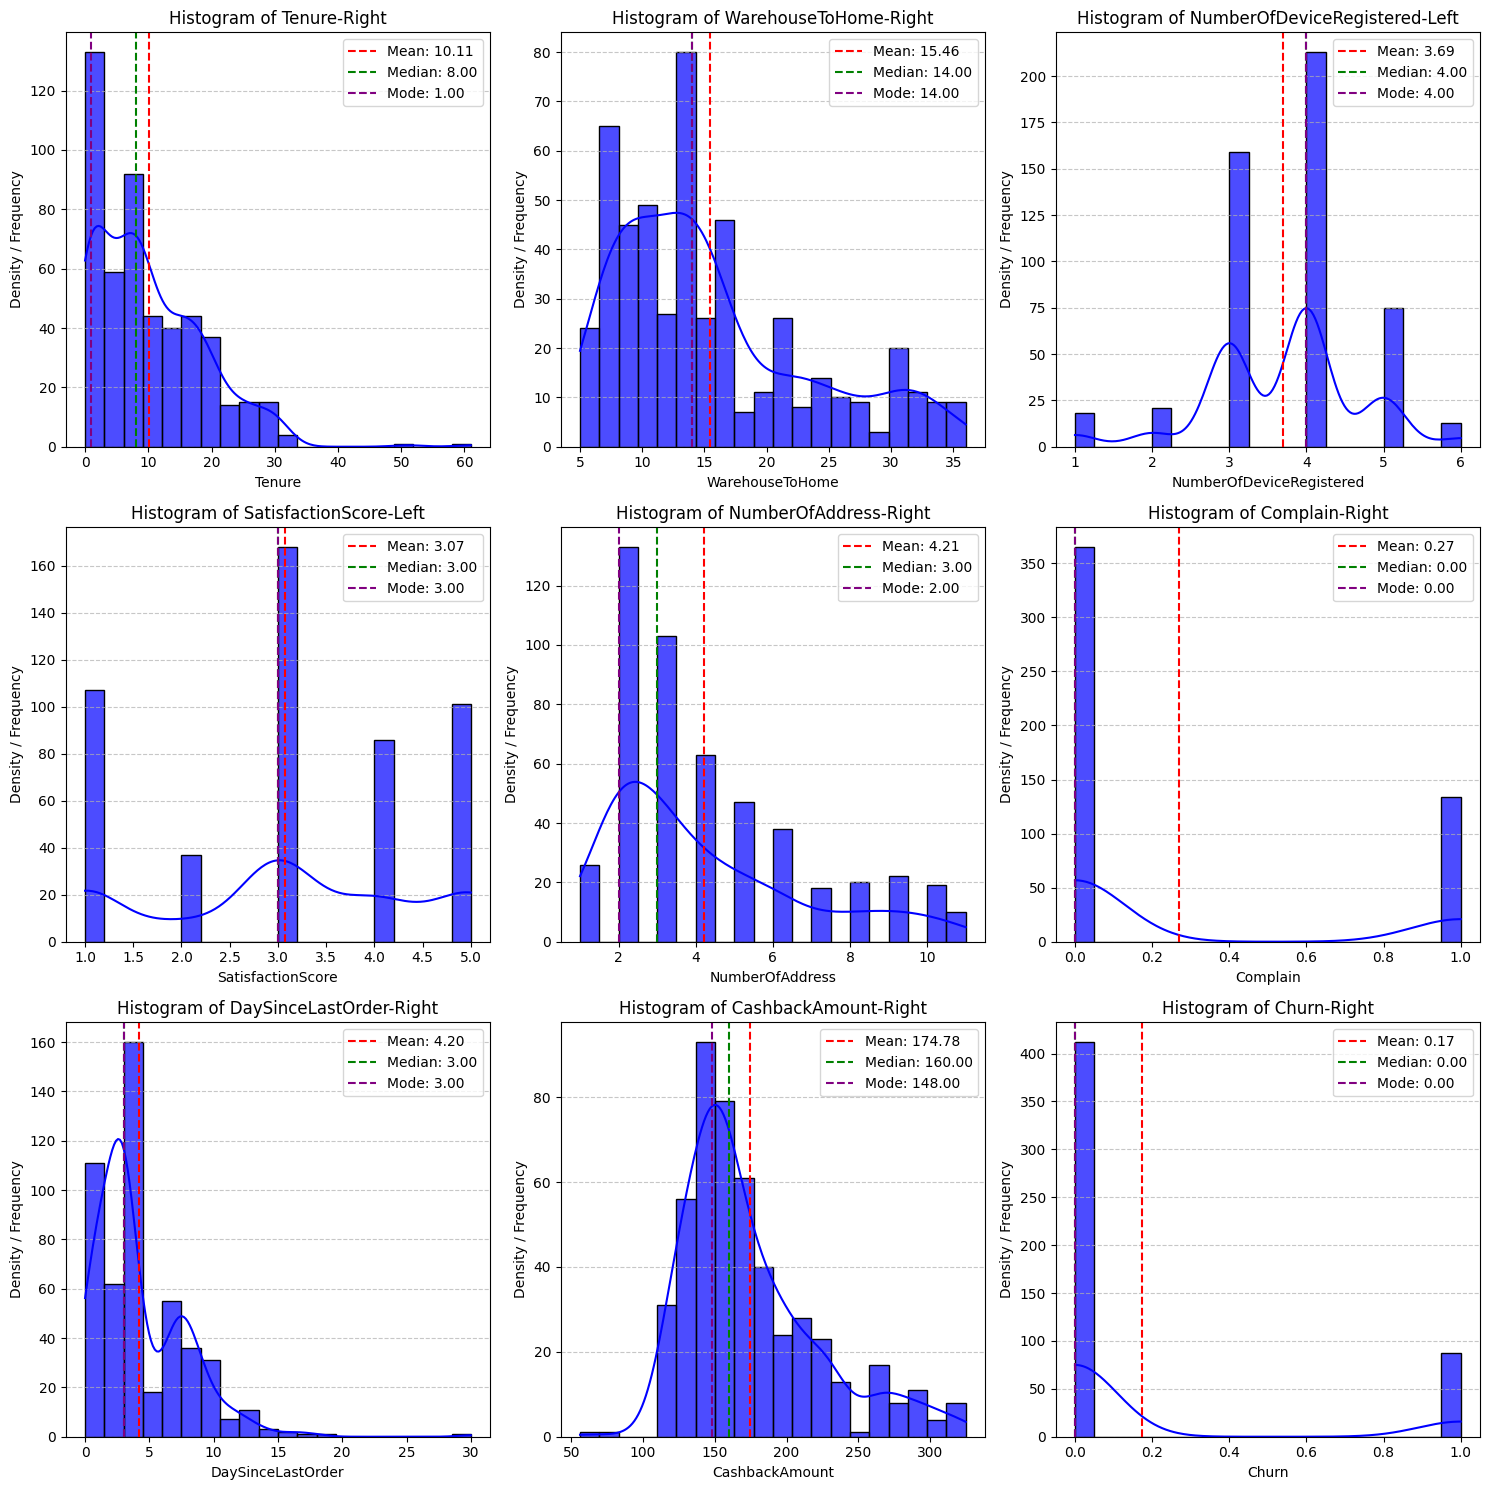

In [3]:
# Univariate Analysis : Plot histograms and check skewness for all numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
rows = (len(numerical_columns) // 3) + (1 if len(numerical_columns) % 3 != 0 else 0)
cols = min(len(numerical_columns), 3)

plt.figure(figsize=(15, rows * 5))
for i, col in enumerate(numerical_columns, 1):
    # Mean, Median, and Skewness Calculation
    mean = df[col].mean()
    median = df[col].median()
    skewness = df[col].skew()

    # Determine skewness type
    if skewness > 0:
        skew='Right'
    elif skewness < 0:
        skew='Left'
    else:
        skew='No skew'

    plt.subplot(rows, cols, i)  
    sns.histplot(df[col], kde=True, bins=20, color='blue', alpha=0.7)
    
    # Add mean, median, and mode lines
    mode_val = df[col].mode()[0]
    plt.axvline(mean, color='red', linestyle='--', label=f'Mean: {mean:.2f}')
    plt.axvline(median, color='green', linestyle='--', label=f'Median: {median:.2f}')
    plt.axvline(mode_val, color='purple', linestyle='--', label=f'Mode: {mode_val:.2f}')
    
    # Titles and labels
    plt.title(f"Histogram of {col}-{skew}")
    plt.xlabel(col)
    plt.ylabel("Density / Frequency")
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

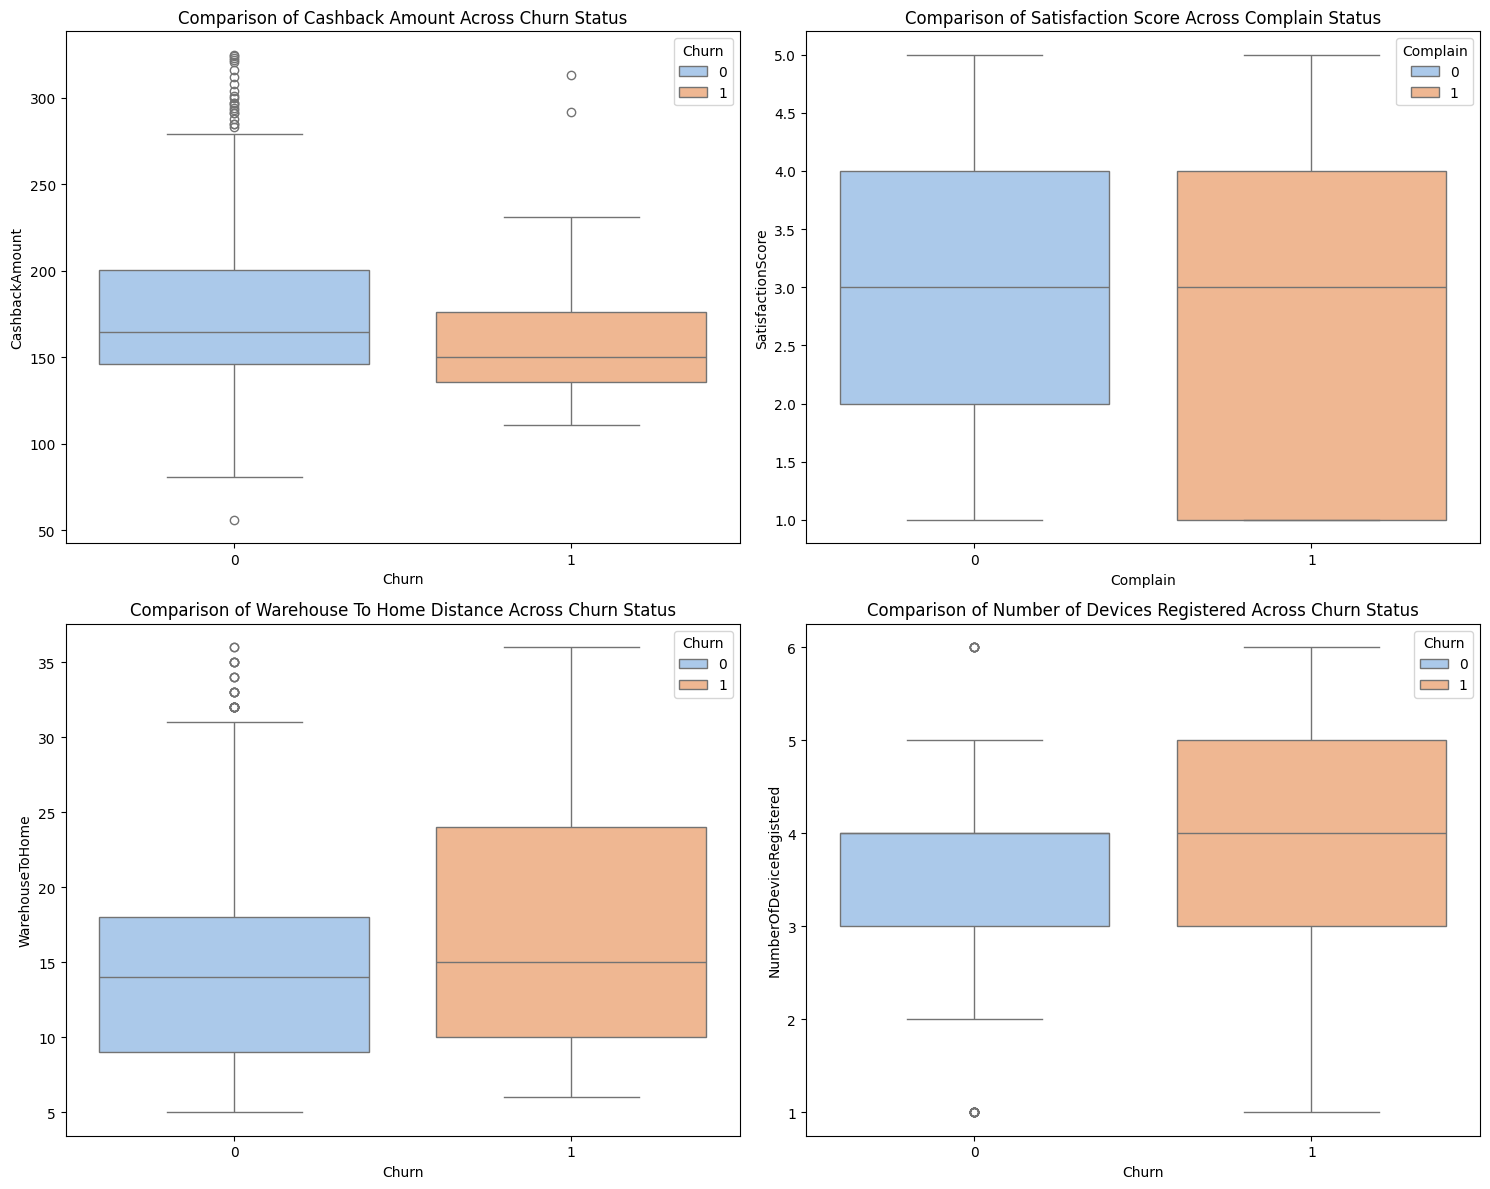

In [4]:
# Generate boxplots for the dataset to analyze relationships and outliers

# Set the pastel color palette
sns.set_palette("pastel")

# Create a figure for boxplots
plt.figure(figsize=(15, 12))

# Boxplot 1: Compare numerical columns (e.g., CashbackAmount) across categorical variables (e.g., Churn)
plt.subplot(2, 2, 1)
sns.boxplot(x='Churn', y='CashbackAmount', data=df, hue='Churn')
plt.title('Comparison of Cashback Amount Across Churn Status')

# Boxplot 2: Compare numerical columns (e.g., SatisfactionScore) across another categorical variable (e.g., Complain)
plt.subplot(2, 2, 2)
sns.boxplot(x='Complain', y='SatisfactionScore', data=df, hue='Complain')
plt.title('Comparison of Satisfaction Score Across Complain Status')

# Boxplot 3: Compare numerical columns (e.g., WarehouseToHome) across a categorical variable (e.g., Churn)
plt.subplot(2, 2, 3)
sns.boxplot(x='Churn', y='WarehouseToHome', data=df, hue='Churn')
plt.title('Comparison of Warehouse To Home Distance Across Churn Status')

# Boxplot 4: Compare numerical columns (e.g., NumberOfDeviceRegistered) across a categorical variable (e.g., Churn)
plt.subplot(2, 2, 4)
sns.boxplot(x='Churn', y='NumberOfDeviceRegistered', data=df, hue='Churn')
plt.title('Comparison of Number of Devices Registered Across Churn Status')

# Adjust layout and display plots
plt.tight_layout()
plt.show()

#interpretation:
#Comparison of Cashback Amount Across Churn Status:
#Dots above the whiskers indicate customers with unusually high cashback amounts.
#The central line in the box shows the typical cashback amount for each churn category.
#SNon-churn customers generally have a narrower range of cashback amounts compared to churned customers.

#Comparison of Satisfaction Score Across Complain Status:
#Few outliers are visible for complain status, showing extreme satisfaction scores.
#Customers with no complaints have slightly higher median satisfaction scores.
#DSatisfaction scores are more varied for customers who have complaints.

#Comparison of Warehouse To Home Distance Across Churn Status:
#There are outliers for longer distances, particularly for non-churn customers.
#Customers who churn tend to have slightly shorter median distances compared to non-churn customers.
#The distance distribution is wider for non-churn customers.

#Comparison of Number of Devices Registered Across Churn Status:
#A few outliers exist for customers registering an unusually high number of devices.
#Non-churn customers tend to register slightly more devices than churned customers.
#The distribution of registered devices is more concentrated for non-churn customers.


C:\Users\HP\AppData\Local\Temp\ipykernel_8624\787208940.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette='pastel')
C:\Users\HP\AppData\Local\Temp\ipykernel_8624\787208940.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette='pastel')


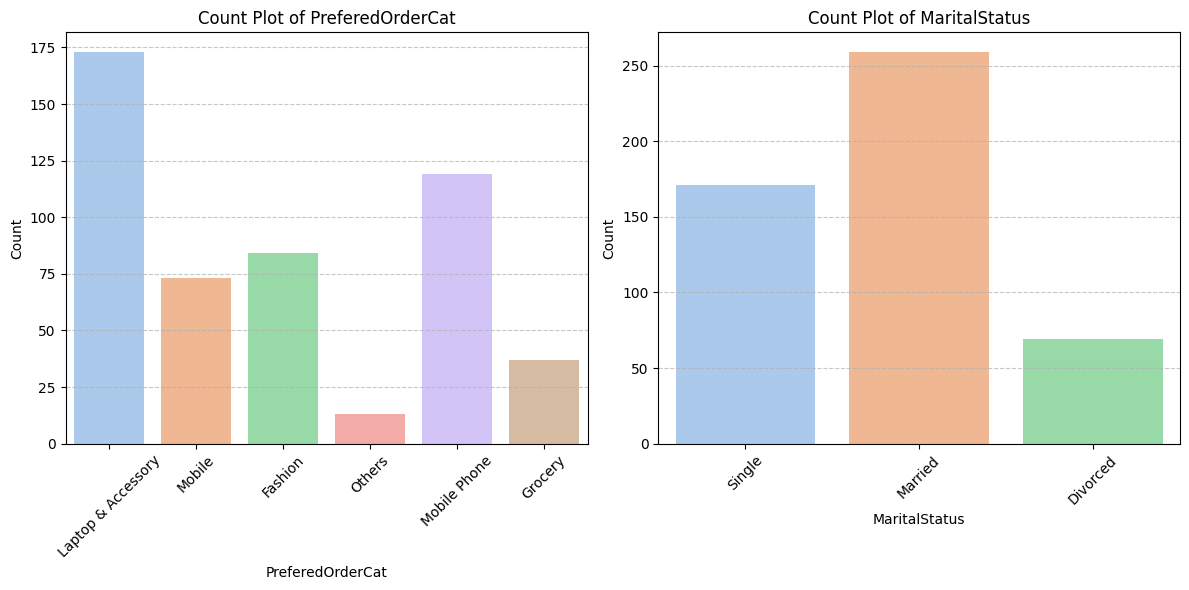

In [5]:
# Select categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Plotting count plots for all categorical columns in one figure
plt.figure(figsize=(12, 6))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(1, 2, i)  # Adjust the layout for two categorical columns
    sns.countplot(x=column, data=df, palette='pastel')
    plt.title(f"Count Plot of {column}")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

#PreferedOrderCat:
#The most common category is "Laptop & Accessory."
#Categories such as "Mobile" and "Fashion" are also popular.
#Other categories have relatively lower counts, indicating less preference among users.

#MaritalStatus:

#The majority of the customers are "Married."
#"Single" is the second most common status.
#"Divorced" has the lowest count, suggesting fewer customers in this group.

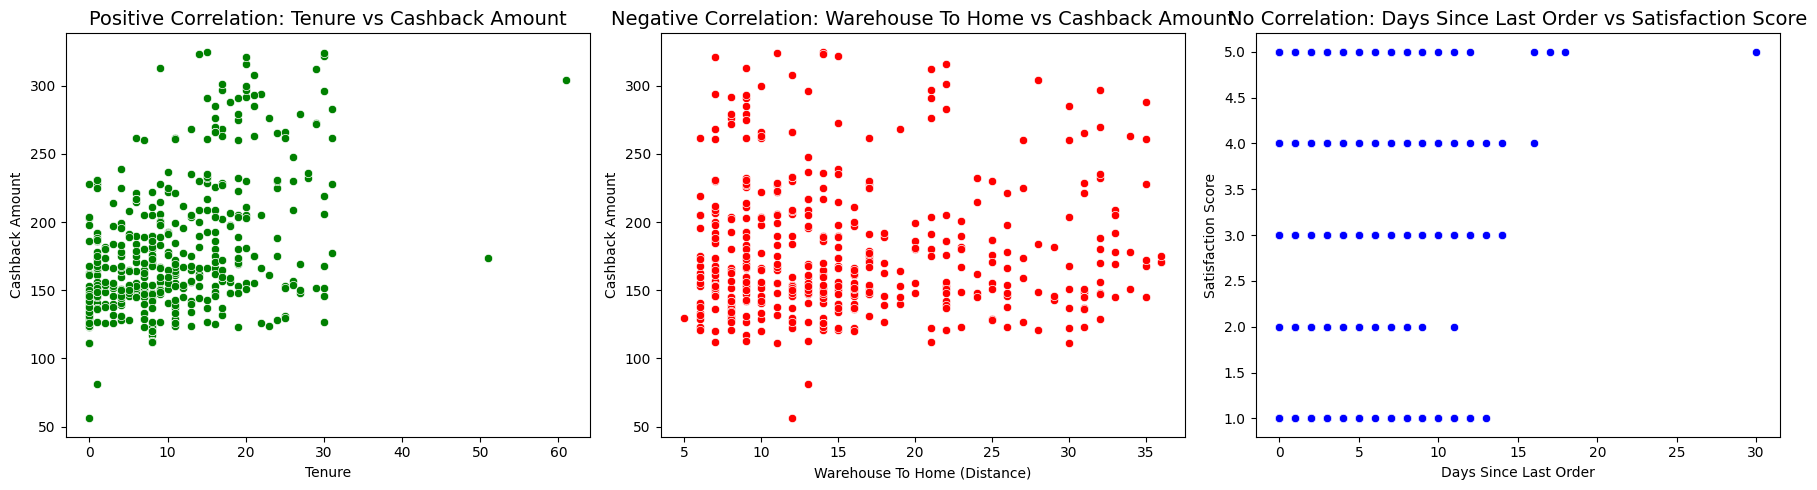

In [6]:
# Displaying the scatter plots to identify correlations in the dataset
plt.figure(figsize=(18, 5))

# Positive Correlation example: CashbackAmount vs. Tenure
plt.subplot(1, 3, 1)
sns.scatterplot(x='Tenure', y='CashbackAmount', data=df, color='green')
plt.title('Positive Correlation: Tenure vs Cashback Amount', fontsize=14)
plt.xlabel('Tenure')
plt.ylabel('Cashback Amount')

# Negative Correlation example: WarehouseToHome vs. CashbackAmount
plt.subplot(1, 3, 2)
sns.scatterplot(x='WarehouseToHome', y='CashbackAmount', data=df, color='red')
plt.title('Negative Correlation: Warehouse To Home vs Cashback Amount', fontsize=14)
plt.xlabel('Warehouse To Home (Distance)')
plt.ylabel('Cashback Amount')

# No Correlation example: DaySinceLastOrder vs. SatisfactionScore
plt.subplot(1, 3, 3)
sns.scatterplot(x='DaySinceLastOrder', y='SatisfactionScore', data=df, color='blue')
plt.title('No Correlation: Days Since Last Order vs Satisfaction Score', fontsize=14)
plt.xlabel('Days Since Last Order')
plt.ylabel('Satisfaction Score')

plt.tight_layout()
plt.show()

#Positive Correlation: Tenure vs Cashback Amount
#As the Tenure increases, the CashbackAmount generally increases.
#This indicates a positive relationship where customers with longer tenure receive higher cashback amounts.

#Negative Correlation: Warehouse To Home vs Cashback Amount
#As the distance (WarehouseToHome) increases, the CashbackAmount decreases.
#This suggests that customers closer to the warehouse tend to receive higher cashback amounts, possibly due to cost savings.

#No Correlation: Days Since Last Order vs Satisfaction Score
#There is no clear trend between DaySinceLastOrder and SatisfactionScore.
#The satisfaction score does not appear to depend on the number of days since the last order.

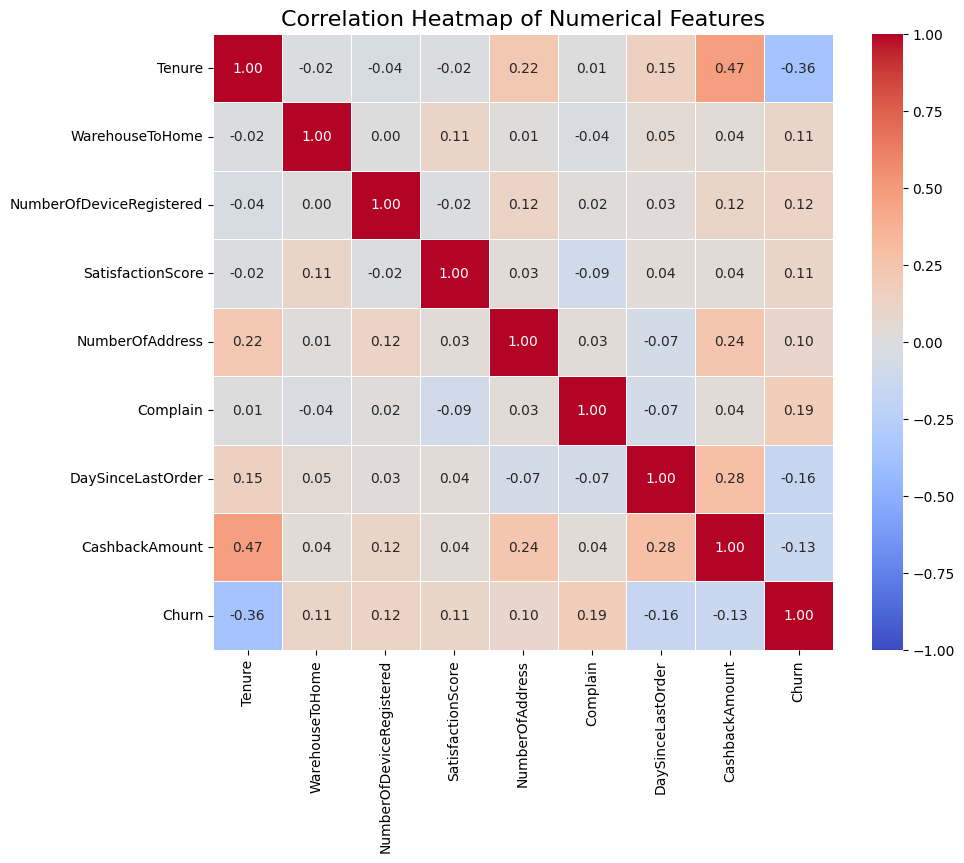

In [7]:
# Generating the correlation heatmap for numerical columns in the dataset
import numpy as np

# Selecting numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Calculating the correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1, linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features", fontsize=16)
plt.show()

#Strong Correlations:
#Tenure and CashbackAmount (0.47): Indicates a moderate positive relationship, suggesting that customers with higher tenure are likely to receive more cashback.
#Tenure and Churn (-0.36): Indicates a moderate negative relationship, meaning that customers with longer tenure are less likely to churn.

#Weak to No Significant Correlations:
#Most other pairs, such as WarehouseToHome and CashbackAmount (0.04) or SatisfactionScore and Churn (0.11), show weak correlations, suggesting minimal or no linear relationships.
#Interesting Observations:

##NumberOfAddress has a small positive correlation with CashbackAmount (0.24), possibly suggesting that customers with multiple addresses receive slightly higher cashback.
#DaySinceLastOrder and CashbackAmount (0.28) show a weak positive correlation, hinting that more time since the last order might result in higher cashback.'''

In [8]:
from sklearn.preprocessing import LabelEncoder

# Creating a LabelEncoder instance
encoder = LabelEncoder()

# Encoding categorical features
df["MaritalStatus"] = encoder.fit_transform(df["MaritalStatus"])
df["PreferedOrderCat"] = encoder.fit_transform(df["PreferedOrderCat"])

# Display the updated DataFrame
print(df.head())

#interpretation:
#Before Encoding:
#MaritalStatus: ['Single', 'Married', 'Divorced']
#PreferedOrderCat: ['Laptop & Accessory', 'Mobile', 'Fashion', 'Others']

#after Encoding:
##MaritalStatus: [0, 1, 2]
#PreferedOrderCat: [0, 1, 2, 3] (encoding order may vary depending on the data).

   Tenure  WarehouseToHome  NumberOfDeviceRegistered  PreferedOrderCat  \
0    15.0             29.0                         4                 2   
1     7.0             25.0                         4                 3   
2    27.0             13.0                         3                 2   
3    20.0             25.0                         4                 0   
4    30.0             15.0                         4                 5   

   SatisfactionScore  MaritalStatus  NumberOfAddress  Complain  \
0                  3              2                2         0   
1                  1              1                2         0   
2                  1              1                5         0   
3                  3              0                7         0   
4                  4              2                8         0   

   DaySinceLastOrder  CashbackAmount  Churn  
0                7.0             143      0  
1                7.0             129      0  
2                7.0

In [9]:
X=df.drop('Churn',axis=1).values  #independent variable - features
y=df['Churn'].values   #dependent variable - target
print(X.shape)
print(y.shape)

#Interpretation : 
#test_size=0.4 : 40% testing ,60% training 
#random state : ensures that the data is split in the same way every time you run the code.
#stratify=y  :  both the training and testing sets have a similar proportion of 0's and 1's

(499, 10)
(499,)


In [10]:
x_train,x_test,y_train,y_test = train_test_split(X,y,stratify=y)
print(x_train.shape)
print(x_test.shape)

(374, 10)
(125, 10)


In [11]:
from sklearn.preprocessing import StandardScaler
# Scale dataset
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

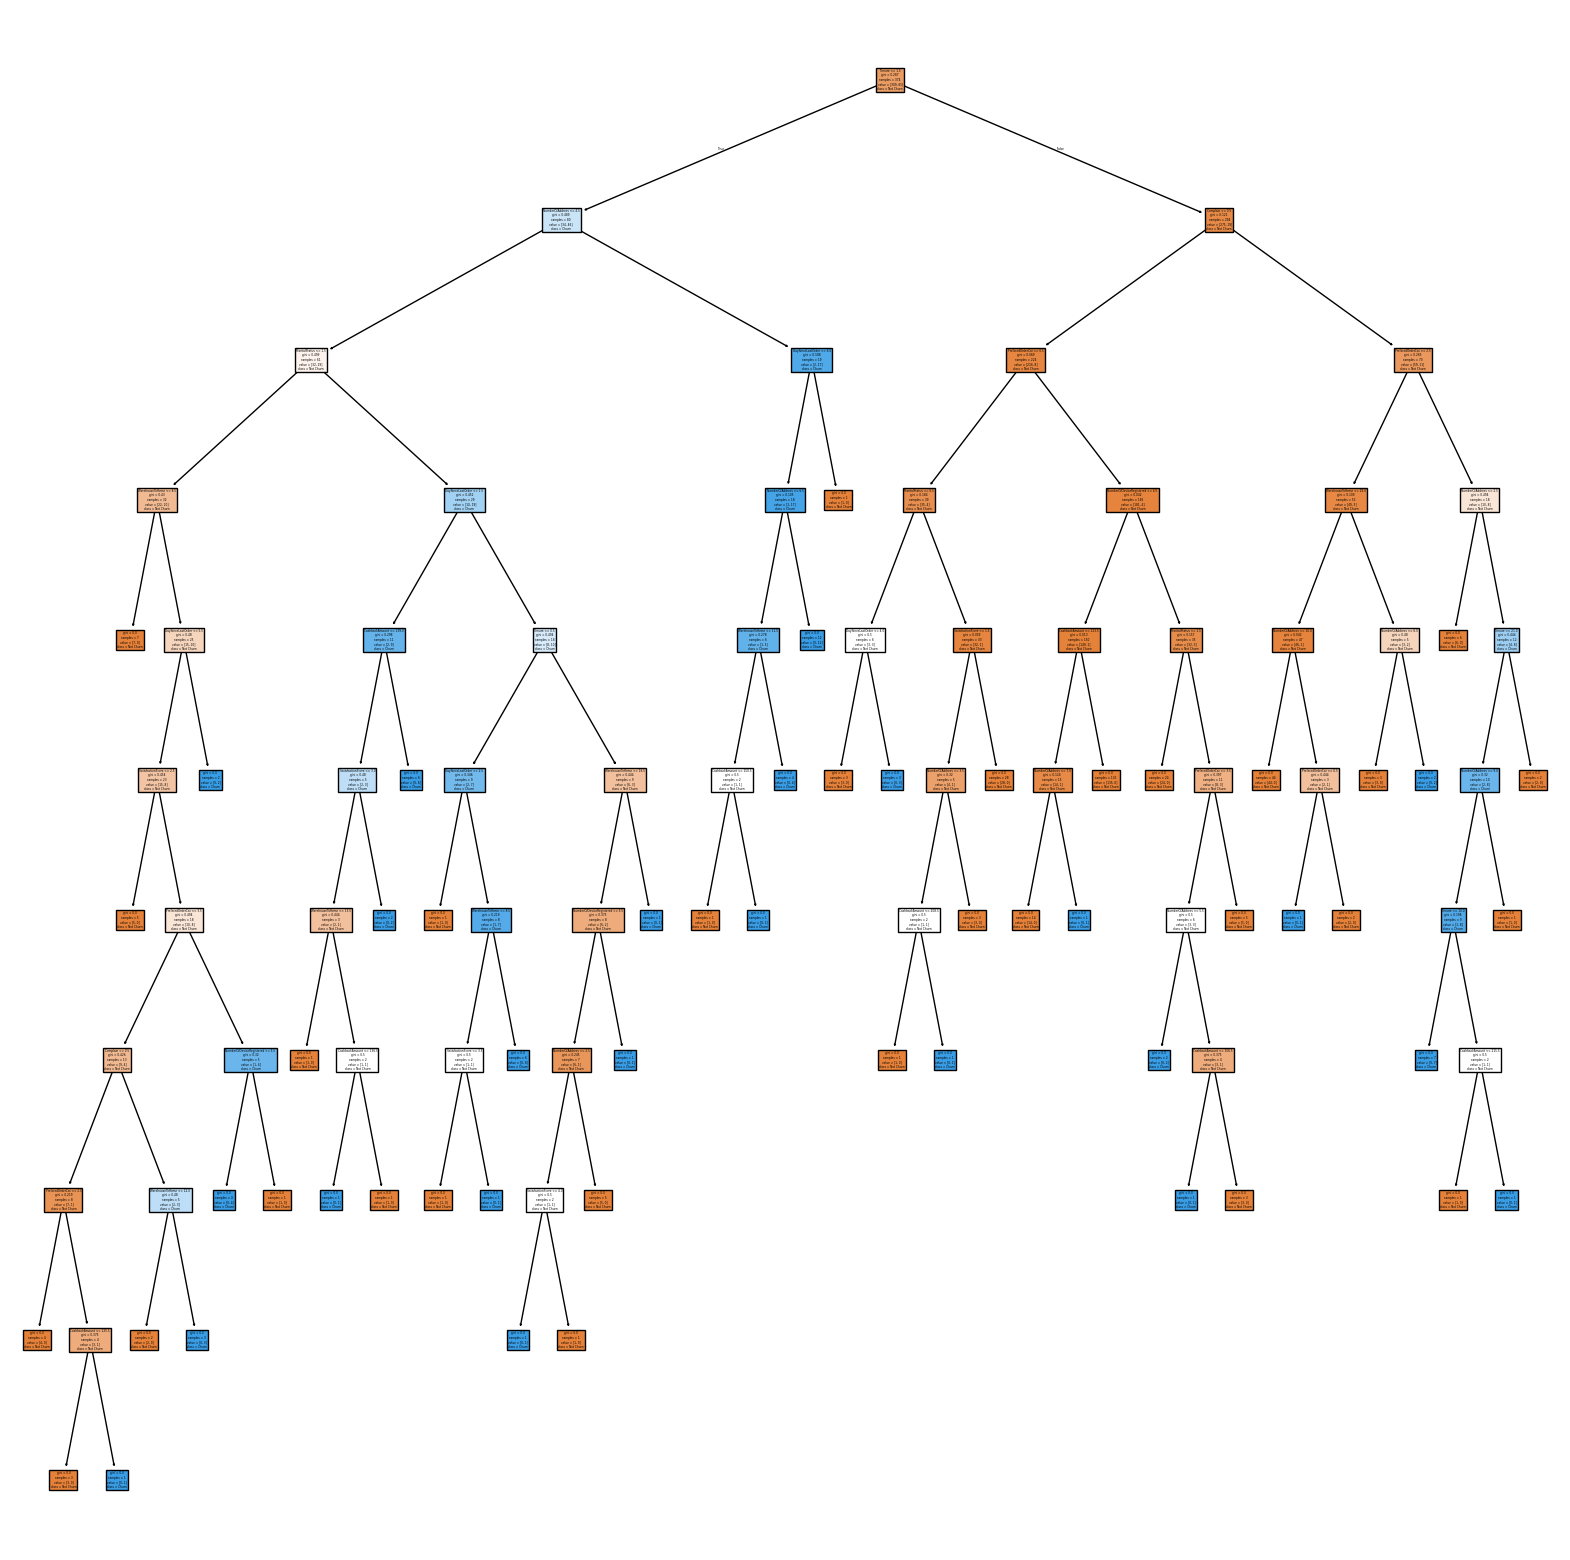

In [12]:
#Gini decision tree
clf = tree.DecisionTreeClassifier(random_state=0)
clf.fit(x_train,y_train)
y_train_pred = clf.predict(x_train)
y_test_pred = clf.predict(x_test)
plt.figure(figsize=(20,20))
features = df.columns
classes = ['Not Churn','Churn']
tree.plot_tree(clf,feature_names=features,class_names=classes,filled=True)
plt.show()

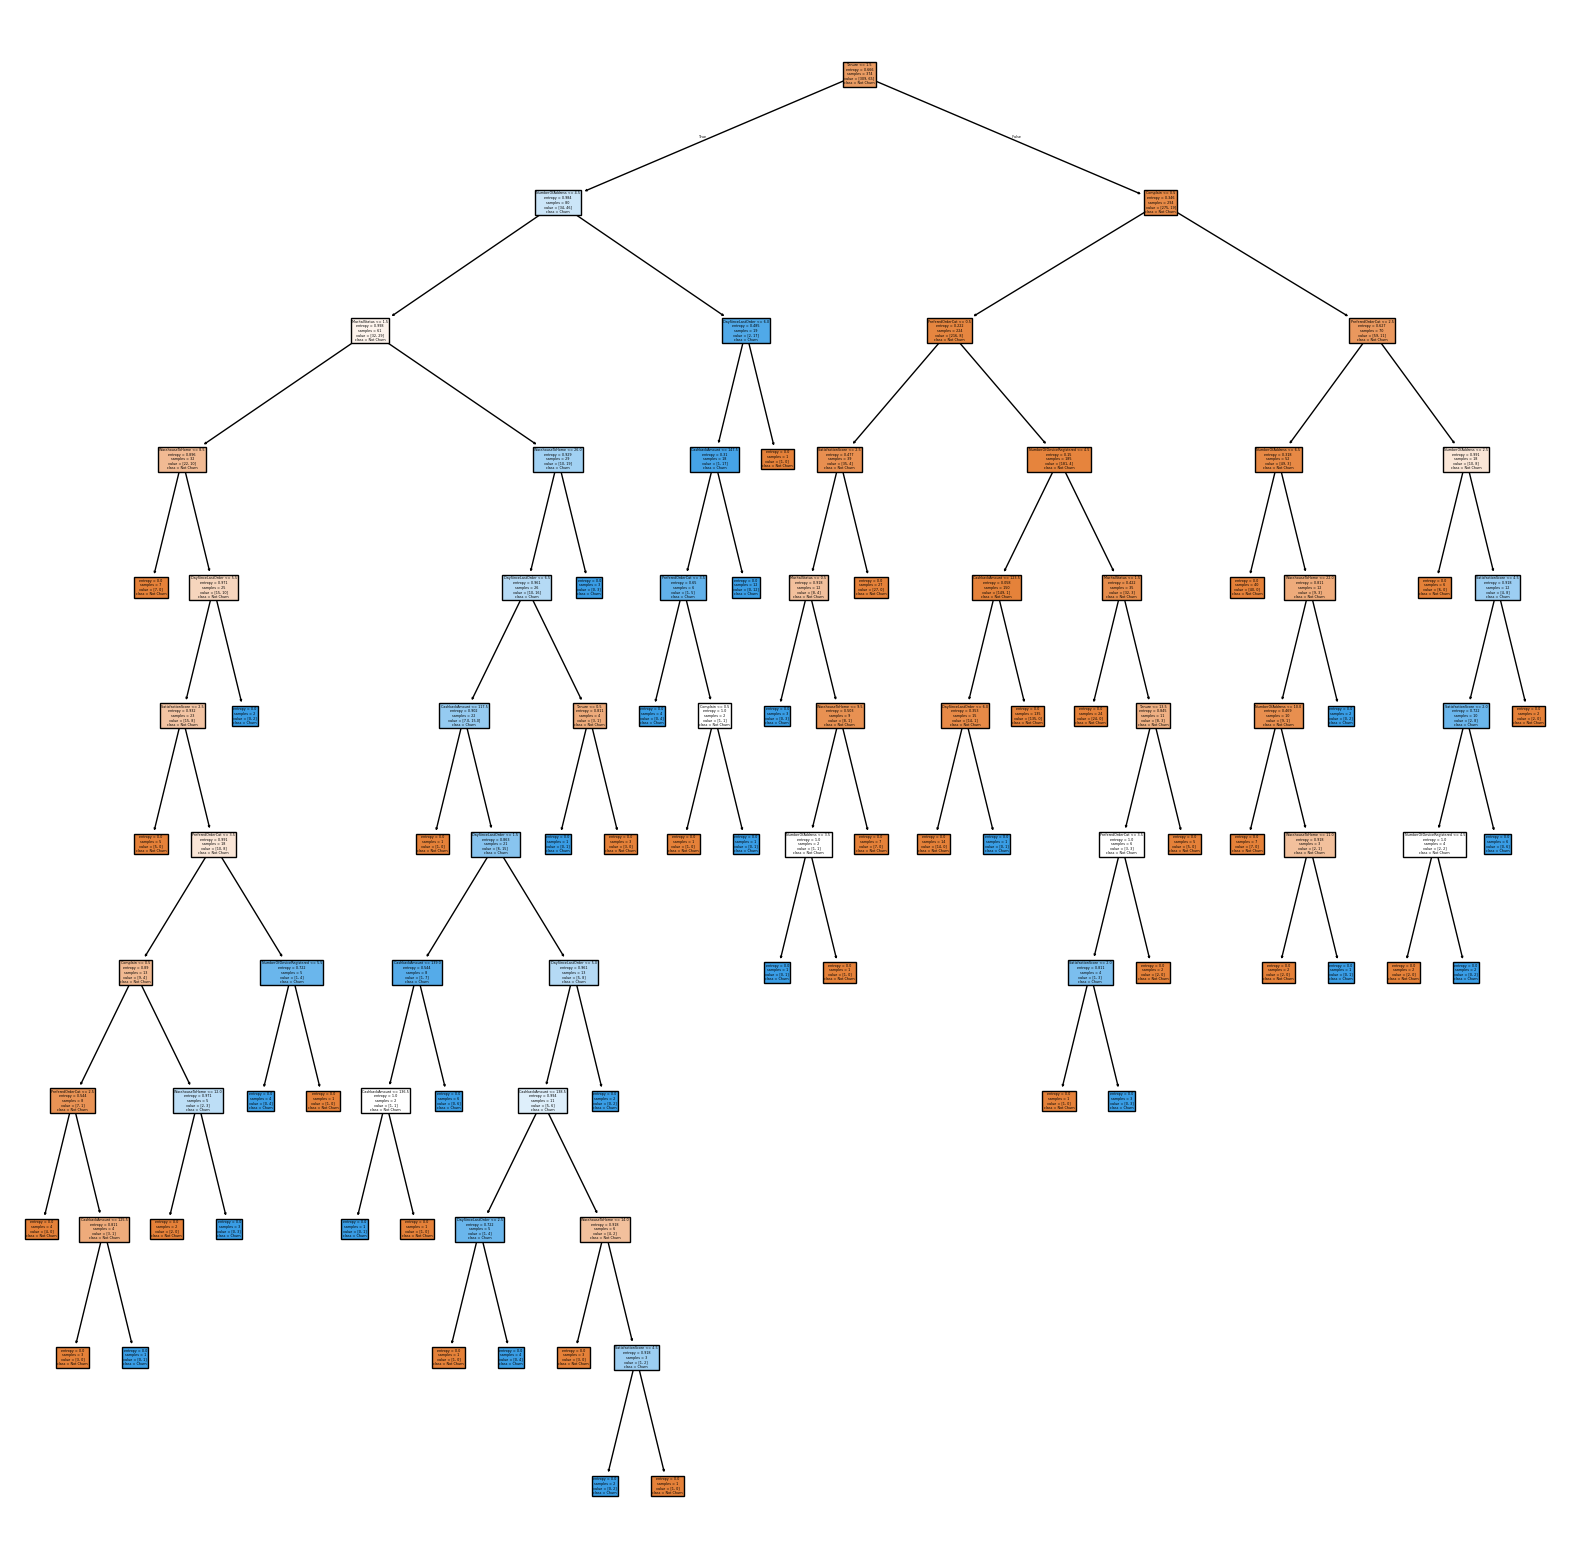

In [13]:
#entropy decision tree
clf = tree.DecisionTreeClassifier(random_state=0,criterion='entropy')
clf.fit(x_train,y_train)
y_train_pred = clf.predict(x_train)
y_test_pred = clf.predict(x_test)
plt.figure(figsize=(20,20))
features = df.columns
classes = ['Not Churn','Churn']
tree.plot_tree(clf,feature_names=features,class_names=classes,filled=True)
plt.show()

Gini Decision Tree
Train score: 1.0
Test score: 0.872


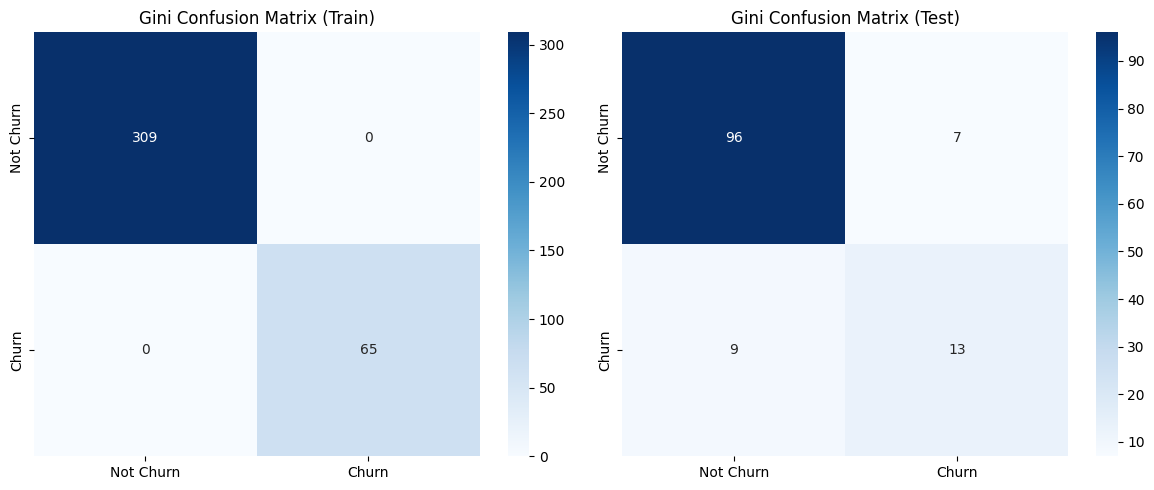


Entropy Decision Tree
Train score: 1.0
Test score: 0.84


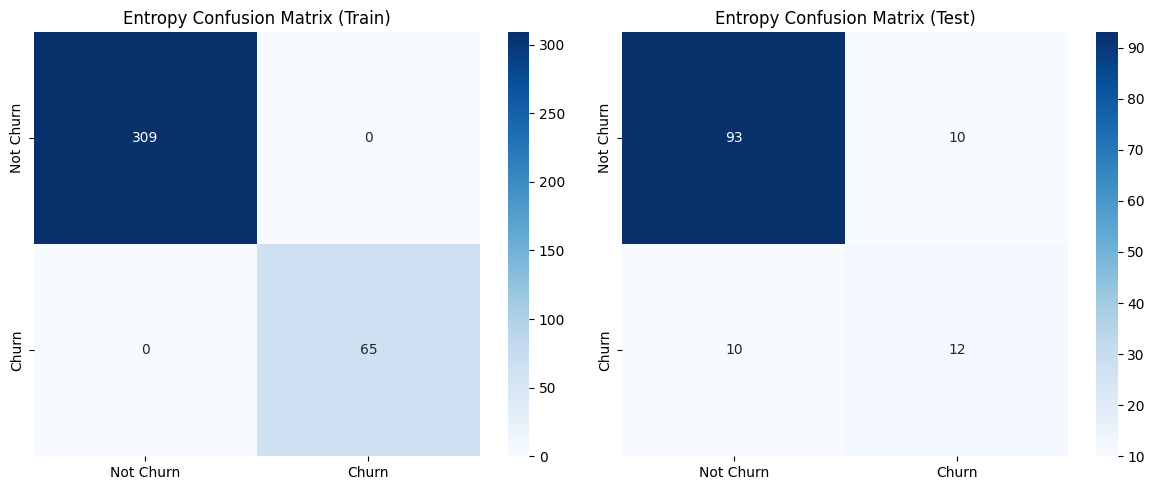

In [14]:

# Helper function to plot confusion matrices side by side
from sklearn.tree import DecisionTreeClassifier
def plot_confusionmatrix_side_by_side(y_train_pred, y_train, y_test_pred, y_test, dom):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # Create a 1x2 grid of subplots
    train_cf = confusion_matrix(y_train, y_train_pred)
    test_cf = confusion_matrix(y_test, y_test_pred)
    
    # Plot train confusion matrix
    sns.heatmap(train_cf, annot=True, fmt='g', cmap='Blues', ax=axes[0], 
                xticklabels=classes, yticklabels=classes)
    axes[0].set_title(f'{dom} Confusion Matrix (Train)')
    # Plot test confusion matrix
    
    sns.heatmap(test_cf, annot=True, fmt='g', cmap='Blues', ax=axes[1], 
                xticklabels=classes, yticklabels=classes)
    axes[1].set_title(f'{dom} Confusion Matrix (Test)')
    plt.tight_layout()
    plt.show()
    
# Features and classes
features = df.columns
classes = ['Not Churn', 'Churn']

# 1. Gini Decision Tree
clf_gini = DecisionTreeClassifier(random_state=0)
clf_gini.fit(x_train, y_train)
y_train_pred_gini = clf_gini.predict(x_train)
y_test_pred_gini = clf_gini.predict(x_test)

print("Gini Decision Tree")
print(f'Train score: {accuracy_score(y_train_pred_gini, y_train)}')
print(f'Test score: {accuracy_score(y_test_pred_gini, y_test)}')
plot_confusionmatrix_side_by_side(y_train_pred_gini, y_train, y_test_pred_gini, y_test, dom='Gini')

# 2. Entropy Decision Tree
clf_entropy = DecisionTreeClassifier(random_state=0, criterion='entropy')
clf_entropy.fit(x_train, y_train)
y_train_pred_entropy = clf_entropy.predict(x_train)
y_test_pred_entropy = clf_entropy.predict(x_test)

print("\nEntropy Decision Tree")
print(f'Train score: {accuracy_score(y_train_pred_entropy, y_train)}')
print(f'Test score: {accuracy_score(y_test_pred_entropy, y_test)}')
plot_confusionmatrix_side_by_side(y_train_pred_entropy, y_train, y_test_pred_entropy, y_test, dom='Entropy')


Pre-Pruned Gini Decision Tree
Best Parameters (Gini): {'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}
Train score: 0.87
Test score: 0.86


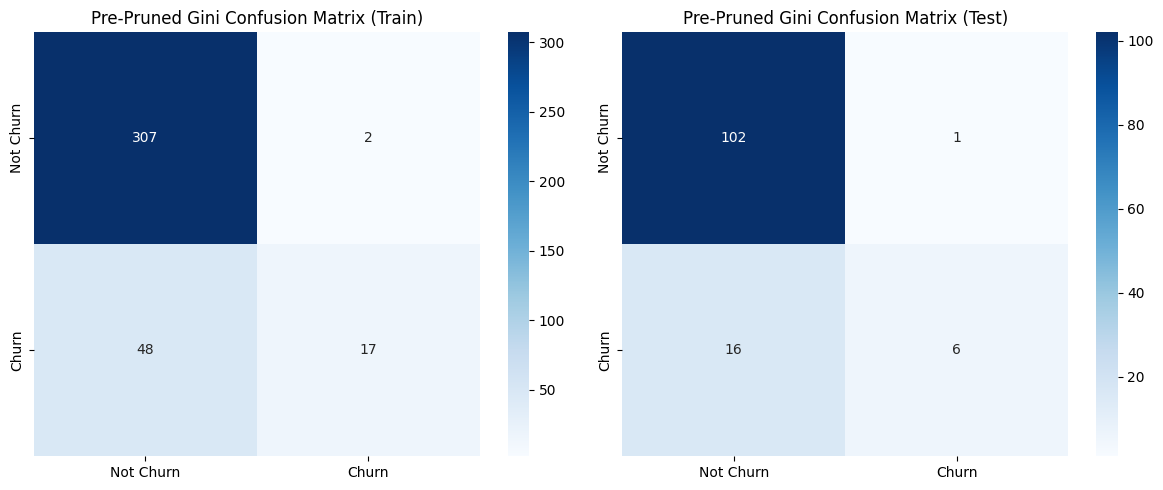


Pre-Pruned Entropy Decision Tree
Best Parameters (Entropy): {'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}
Train score: 0.90
Test score: 0.83


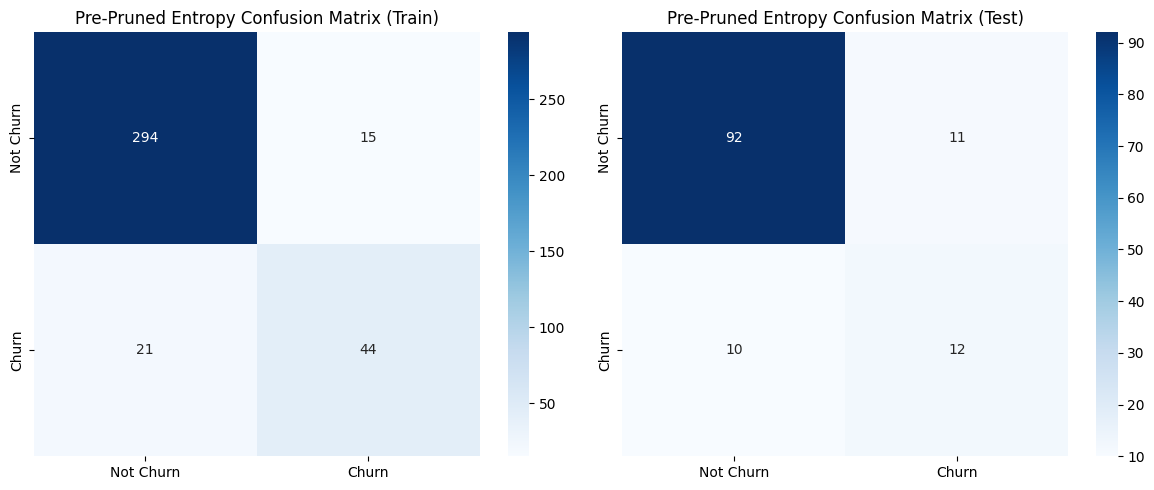

In [15]:
# Pre-pruning with Gini
params = {
    'max_depth': [2, 4, 6, 8, 10, 12],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2]
}

# Gini Pre-pruned Decision Tree
clf_gini = DecisionTreeClassifier(random_state=0, criterion='gini')
gcv_gini = GridSearchCV(estimator=clf_gini, param_grid=params, cv=5, scoring='accuracy')
gcv_gini.fit(x_train, y_train)

# Best pre-pruned Gini model
best_model_gini = gcv_gini.best_estimator_
best_model_gini.fit(x_train, y_train)
y_train_pred_gini = best_model_gini.predict(x_train)
y_test_pred_gini = best_model_gini.predict(x_test)

print("\nPre-Pruned Gini Decision Tree")
print(f'Best Parameters (Gini): {gcv_gini.best_params_}')
print(f'Train score: {accuracy_score(y_train, y_train_pred_gini):.2f}')
print(f'Test score: {accuracy_score(y_test, y_test_pred_gini):.2f}')
plot_confusionmatrix_side_by_side(y_train_pred_gini, y_train, y_test_pred_gini, y_test, dom='Pre-Pruned Gini')

# Pre-pruning with Entropy
clf_entropy = DecisionTreeClassifier(random_state=0, criterion='entropy')
gcv_entropy = GridSearchCV(estimator=clf_entropy, param_grid=params, cv=5, scoring='accuracy')
gcv_entropy.fit(x_train, y_train)

# Best pre-pruned Entropy model
best_model_entropy = gcv_entropy.best_estimator_
best_model_entropy.fit(x_train, y_train)
y_train_pred_entropy = best_model_entropy.predict(x_train)
y_test_pred_entropy = best_model_entropy.predict(x_test)

print("\nPre-Pruned Entropy Decision Tree")
print(f'Best Parameters (Entropy): {gcv_entropy.best_params_}')
print(f'Train score: {accuracy_score(y_train, y_train_pred_entropy):.2f}')
print(f'Test score: {accuracy_score(y_test, y_test_pred_entropy):.2f}')
plot_confusionmatrix_side_by_side(y_train_pred_entropy, y_train, y_test_pred_entropy, y_test, dom='Pre-Pruned Entropy')


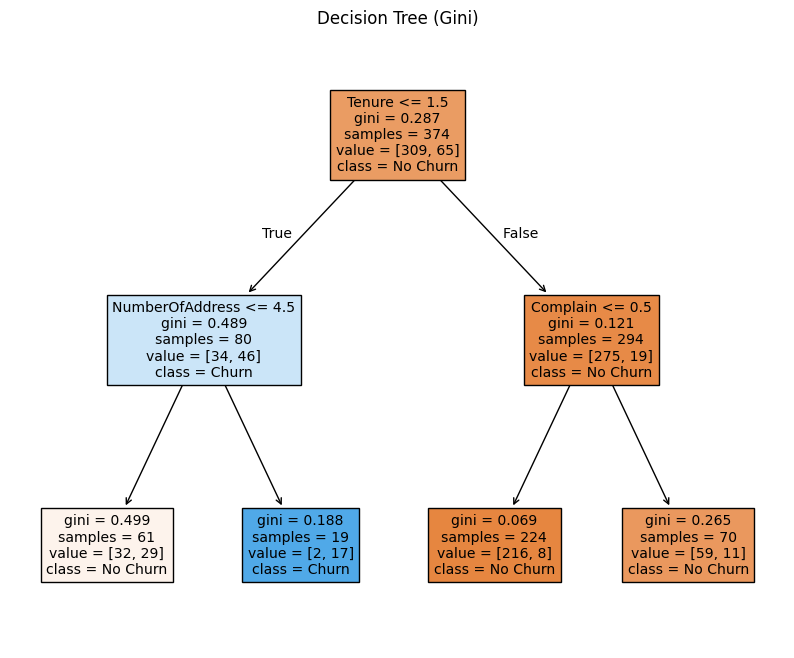

In [16]:
plt.figure(figsize=(10,8))
features = df.columns
classes = ['No Churn','Churn']
tree.plot_tree(best_model_gini,feature_names=features,class_names=classes,filled=True)
plt.title("Decision Tree (Gini)")
plt.show()


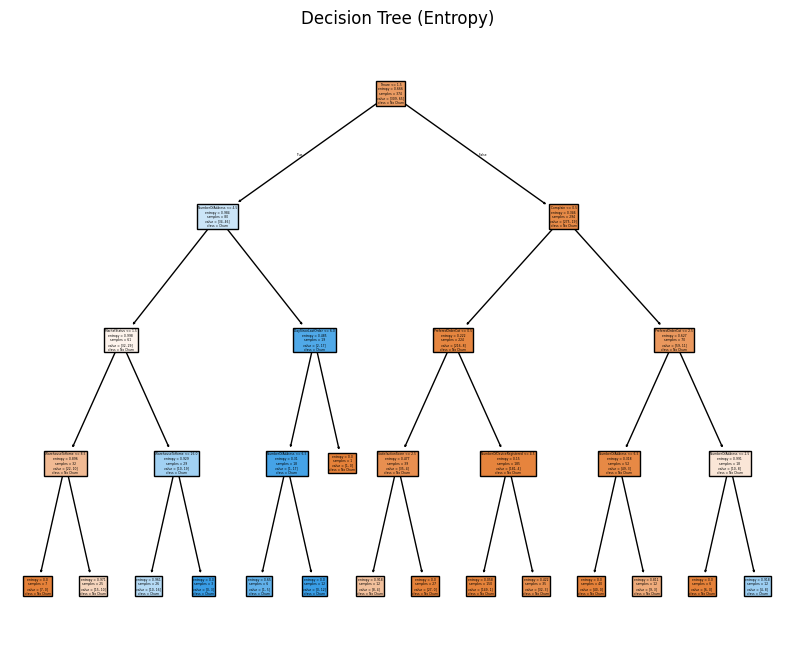

In [18]:
# Plot for Entropy-based Decision Tree
plt.figure(figsize=(10, 8))
tree.plot_tree(best_model_entropy,  # Entropy model
               feature_names=features,
               class_names=classes,
               filled=True)
plt.title("Decision Tree (Entropy)")
plt.show()

In [19]:
path = clf.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas)

[0.         0.00496594 0.00534759 0.00534759 0.00581352 0.0059668
 0.00626999 0.006327   0.0067629  0.00802139 0.00882048 0.00887934
 0.00965145 0.00976463 0.01016115 0.01158649 0.01176326 0.01319239
 0.01349033 0.01408759 0.01553388 0.01821352 0.01823481 0.02293951
 0.02327611 0.18427001]


In [20]:
# For each alpha we will append our model to a list
clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)

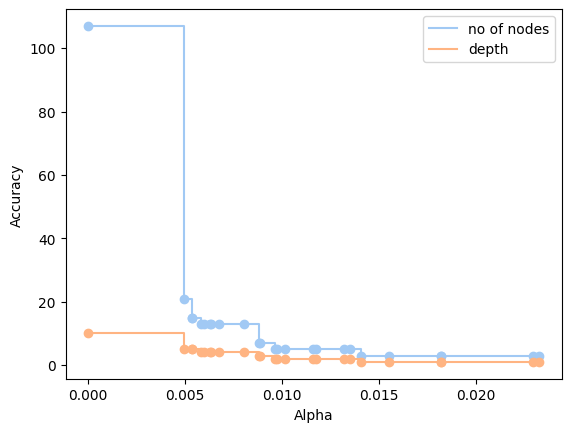

In [21]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
plt.scatter(ccp_alphas,node_counts)
plt.scatter(ccp_alphas,depth)
plt.plot(ccp_alphas,node_counts,label='no of nodes',drawstyle="steps-post")
plt.plot(ccp_alphas,depth,label='depth',drawstyle="steps-post")
plt.xlabel("Alpha")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

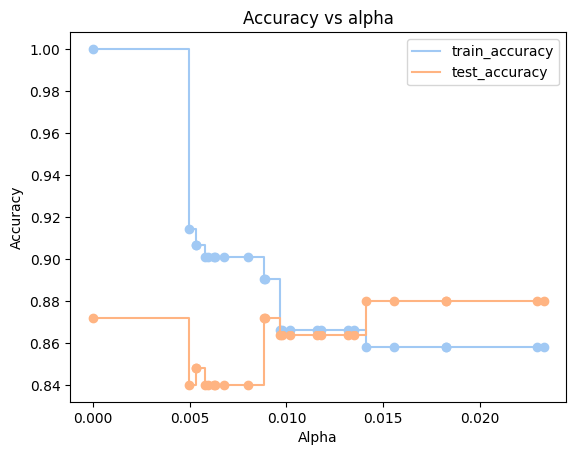

In [22]:
train_acc = []
test_acc = []
for c in clfs:
    y_train_pred = c.predict(x_train)
    y_test_pred = c.predict(x_test)
    train_acc.append(accuracy_score(y_train_pred,y_train))
    test_acc.append(accuracy_score(y_test_pred,y_test))

plt.scatter(ccp_alphas,train_acc)
plt.scatter(ccp_alphas,test_acc)
plt.plot(ccp_alphas,train_acc,label='train_accuracy',drawstyle="steps-post")
plt.plot(ccp_alphas,test_acc,label='test_accuracy',drawstyle="steps-post")
plt.legend()
plt.xlabel("Alpha")
plt.ylabel("Accuracy")
plt.title('Accuracy vs alpha')
plt.show()
#Choose the Best alpha:
#Look for the alpha where the test accuracy is maximized or stabilizes.
#Avoid overfitting (when training accuracy is much higher than test accuracy).

Train score: 0.8663101604278075
Test score: 0.864


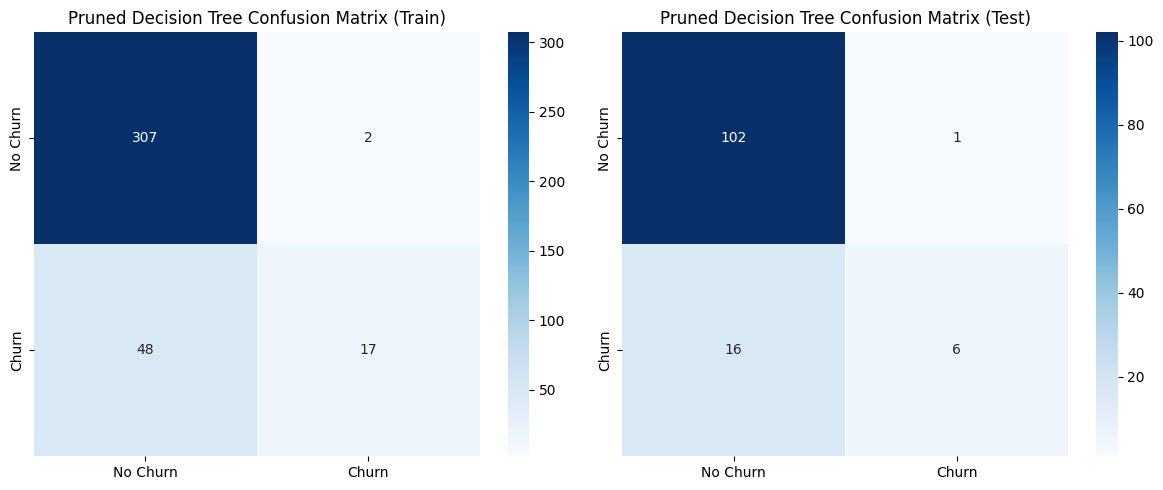

In [24]:
# Pruned Decision Tree with ccp_alpha
clf_ = DecisionTreeClassifier(random_state=0, ccp_alpha=0.01)  # Using ccp_alpha for pruning
clf_.fit(x_train, y_train)
y_train_pred = clf_.predict(x_train)
y_test_pred = clf_.predict(x_test)

# Print scores
print(f'Train score: {accuracy_score(y_train_pred, y_train)}')
print(f'Test score: {accuracy_score(y_test_pred, y_test)}')

# Plot confusion matrices side by side
plot_confusionmatrix_side_by_side(y_train_pred, y_train, y_test_pred, y_test, dom='Pruned Decision Tree')

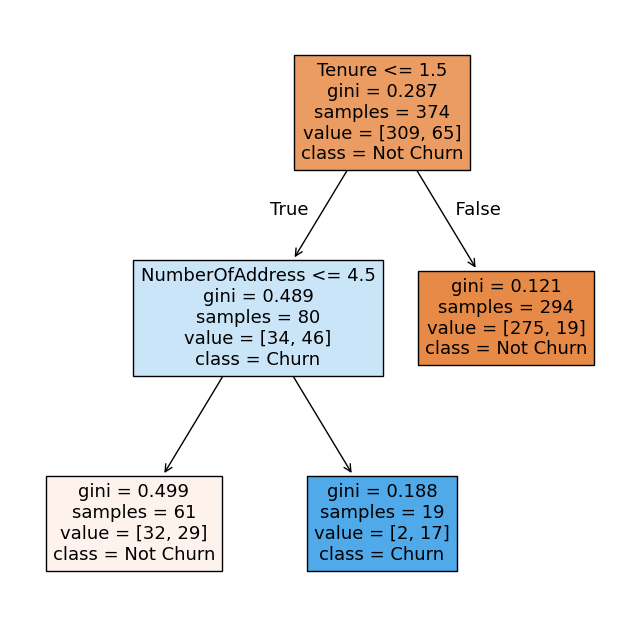

In [25]:
plt.figure(figsize=(8,8))
features = df.columns
classes = ['Not Churn','Churn']
tree.plot_tree(clf_,feature_names=features,class_names=classes,filled=True)
plt.show()

Train score: 0.8850267379679144
Test score: 0.832


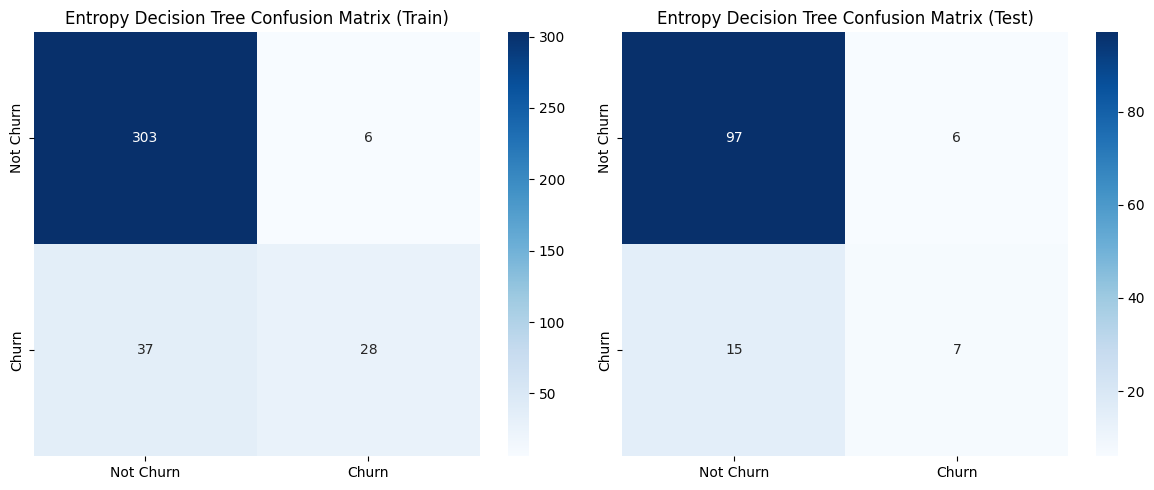

In [31]:
# Decision Tree with Entropy Criterion and ccp_alpha for Pruning
clf_ = DecisionTreeClassifier(random_state=0, criterion='entropy', ccp_alpha=0.015)  # Using entropy and ccp_alpha
clf_.fit(x_train, y_train)
y_train_pred = clf_.predict(x_train)
y_test_pred = clf_.predict(x_test)

# Print scores
print(f'Train score: {accuracy_score(y_train_pred, y_train)}')
print(f'Test score: {accuracy_score(y_test_pred, y_test)}')

# Plot confusion matrices side by side
plot_confusionmatrix_side_by_side(y_train_pred, y_train, y_test_pred, y_test, dom='Entropy Decision Tree')


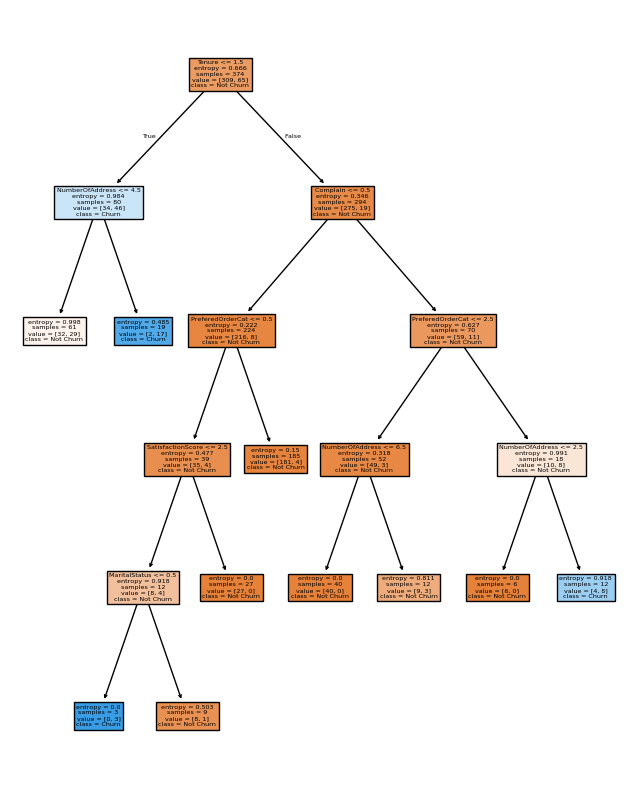

In [32]:
plt.figure(figsize=(8,10))
features = df.columns
classes = ['Not Churn','Churn']
tree.plot_tree(clf_,feature_names=features,class_names=classes,filled=True)
plt.show()

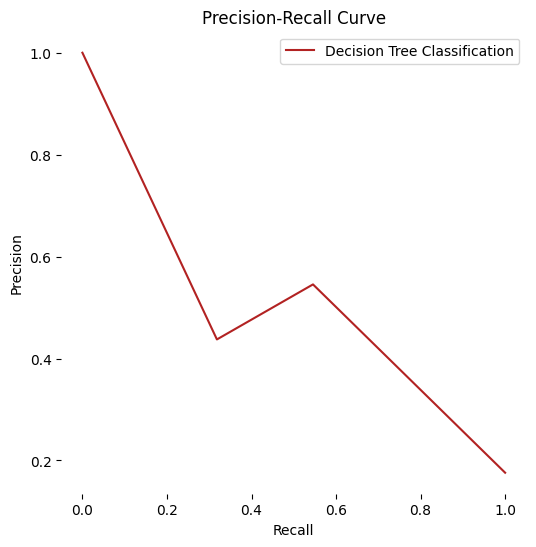

In [30]:
from sklearn.tree import DecisionTreeClassifier  # Import the DecisionTreeClassifier
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Assuming clf_ is already trained DecisionTreeClassifier
# Predict probabilities for the positive class
y_pred_proba = clf_.predict_proba(x_test)[:, 1]  # Use `predict_proba` for probabilities

# Calculate precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Plot the Precision-Recall Curve
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(recall, precision, label='Decision Tree Classification', color='firebrick')
ax.set_title('Precision-Recall Curve')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
plt.box(False)  # Remove the plot box for a cleaner look
ax.legend()
plt.show()
